<a href="https://colab.research.google.com/github/rajivprao/ml/blob/main/Banking_finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
color = sns.color_palette('pastel')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
##import and read the data in dataframe

company = pd.read_csv('Banking_Finance_data(1).csv')


In [ ]:
## look at first 10 rows of the data
company.head(10)

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,Cash profit,PBDITA as % of total income,PBT as % of total income,PAT as % of total income,Cash profit as % of total income,PAT as % of net worth,Sales,Income from financial services,Other income,Total capital,Reserves and funds,Deposits (accepted by commercial banks),Borrowings,Current liabilities & provisions,Deferred tax liability,Shareholders funds,Cumulative retained profits,Capital employed,TOL/TNW,Total term liabilities / tangible net worth,Contingent liabilities / Net worth (%),Contingent liabilities,Net fixed assets,Investments,Current assets,Net working capital,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),Cash to current liabilities (times),Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,1872.8,11.46,9.68,6.18,7.50,23.78,24458.0,158.0,297.2,423.8,6822.8,NaN,14.9,9965.9,284.9,7093.2,6263.3,7108.1,1.33,0.00,14.80,1049.7,1900.2,1069.6,13277.5,3588.5,1.18,1.37,0.00,0.43,68.21,3.62,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,158.6,18.53,12.33,7.54,10.38,38.08,1504.3,4.0,15.9,115.5,257.8,NaN,272.5,210.0,85.2,351.5,247.4,624.0,1.23,0.34,19.23,67.6,286.4,2.2,563.9,203.5,0.95,1.56,0.78,0.06,5.96,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,-1.38,-1.38,0.06,-6.35,475.6,1.5,0.2,81.4,19.2,NaN,35.4,96.8,NaN,100.6,32.4,136.0,1.44,0.29,45.83,46.1,38.7,4.3,167.5,59.6,1.11,1.55,0.35,0.21,17.07,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.5,2.2,NaN,NaN,NaN,NaN,2.7,2.2,2.7,0.00,0.00,0.00,NaN,2.5,NaN,0.2,0.2,NaN,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,0.40,0.35,0.75,5.25,1575.1,3.9,0.9,6.2,161.8,NaN,193.1,112.8,4.6,107.6,82.7,300.7,2.83,1.59,34.94,37.6,94.8,7.4,349.7,215.8,1.41,2.54,1.79,0.00,0.00,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN
5,6,688.6,2434.4,675.8,2648.6,62.3,2636.4,74.5,200.1,74.5,146.9,7.55,2.81,2.81,5.55,21.78,2639.5,6.4,0.2,33.8,972.0,NaN,717.1,555.9,54.4,698.2,317.7,1415.3,1.80,0.37,36.28,245.2,864.9,22.7,1296.2,278.5,0.48,1.27,1.09,0.11,15.78,6.50,21.13,10.14,8.38,4.74,1141718.0,10.0,30.57,15.28,2434.4,NaN
6,7,246.0,327.1,245.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,78.3,241.2,NaN,7.6,NaN,NaN,315.2,-4.3,322.8,0.03,0.03,0.00,NaN,NaN,298.4,20.6,20.6,NaN,NaN,0.32,NaN,NaN,0.00,0.00,NaN,NaN,0.00,50070.0,10.0,0.00,0.00,327.1,NaN
7,8,13.7,80.0,12.7,153.6,-8.5,144.0,1.1,9.7,2.0,4.0,6.32,1.30,0.72,2.60,9.95,153.4,NaN,NaN,10.0,-2.4,NaN,29.3,36.6,1.4,12.7,-2.4,42.0,5.17,0.94,0.00,NaN,10.2,NaN,62.0,8.0,0.54,1.15,2.31,0.04,4.77,3.08,5.53,15.37,11.44,5.92,NaN,NaN,0.00,0.00,80.0,NaN
8,9,291.5,573.8,238.6,582.6,31.0,565.3,48.3,110.1,68.5,82.6,18.90,11.76,8.29,14.18,21.65,573.9,7.3,0.7,58.1,200.5,NaN,204.1,75.1,36.0,258.6,173.8,462.7,1.05,0.30,39.65,94.6,207.4,NaN,328.4,120.4,0.59,1.58,0.94,0.19,28.92,12.52,7.25,5.73,4.62,3.72,3807100.0,10.0,12.69,0.63,573.8,11.67
9,10,-7.3,88.6,19.6,83.4,-6.7,79.1,-2.4,0.3,-14.4,-10.5,0.36,-17.27,-2.88,-12.59,-11.57,83.4,NaN,NaN,50.0,-30.4,NaN,61.4,2.3,5.3,19.6,-30.4,81.0,3.25,0.54,0.00,NaN,24.2,6.8,26.7,-26.4,0.39,0.50,3.13,0.00,0.84,NaN,3.04,42.66,6.36,5.25,5000000.0,10.0,-0.48,-0.48,88.6,-1.88


In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [ ]:
company.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from financial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Deposits (accepted by commercial banks)',
       'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to cur

In [ ]:
company.columns = company.columns.str.replace(' ','_').str.replace('(','').str.replace(')','')\
.str.replace('%','perc').str.replace('/','_to_')

In [ ]:
company.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_financial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds',
       'Deposits_accepted_by_commercial_banks', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_tim

In [ ]:
"""
'TOL/TNW' ==> 'TOL_to_TNW'
"""

"\n'TOL/TNW' ==> 'TOL_to_TNW'\n"

In [ ]:
company.shape

(3541, 52)

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             3541 non-null   int64  
 1   Networth_Next_Year                              3541 non-null   float64
 2   Total_assets                                    3541 non-null   float64
 3   Net_worth                                       3541 non-null   float64
 4   Total_income                                    3343 non-null   float64
 5   Change_in_stock                                 3083 non-null   float64
 6   Total_expenses                                  3402 non-null   float64
 7   Profit_after_tax                                3410 non-null   float64
 8   PBDITA                                          3410 non-null   float64
 9   PBT                                      

In [ ]:
## lets see the descriptive stats measure of the columns of our data

company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Other_income,Total_capital,Reserves_and_funds,Deposits_accepted_by_commercial_banks,Borrowings,Current_liabilities_&_provisions,Deferred_tax_liability,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Contingent_liabilities,Net_fixed_assets,Investments,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,3410.000000,3473.000000,3473.000000,3473.000000,3473.000000,3541.000000,3.282000e+03,2606.000000,2246.000000,3537.000000,3456.000000,0.0,3175.000000,3445.000000,2401.000000,3541.000000,3503.000000,3541.000000,3541.000000,3541.000000,3541.000000,2353.000000,3423.000000,2106.000000,3475.000000,3509.00000,3448.000000,3448.000000,3541.000000,3448.000000,3456.000000,3208.00000,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,392.065044,4.570639,-17.279018,-19.199957,-8.229177,10.269280,4.549520e+03,80.843592,41.356723,216.608962,1163.814641,NaN,1122.279339,940.626909,227.216202,1322.067890,890.513046,2328.347727,3.993892,1.843886,53.938294,932.919380,1189.678060,694.734330,1293.364460,138.56925,1.401395,2.130409,2.779670,0.490400,158.443492,15.44568,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,4226.641122,147.122037,425.433755,429.811312,304.566233,65.148213,5.496465e+04,1115.167572,917.290111,1682.590310,13372.683042,NaN,8681.918467,9546.089901,2170.210872,13445.292593,10112.377944,21069.009543,19.398812,14.773123,378.835447,12973.316473,13291.907689,6895.538755,10131.769374,2945.47641,7.729697,10.108072,14.974057,4.195739,2746.900058,68.20860,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,-2245.700000,-6400.000000,-21340.000000,-21340.000000,-15020.000000,-748.720000,1.000000e-01,0.000000,0.000000,0.100000,-6525.900000,NaN,0.100000,0.100000,0.100000,0.000000,-6534.300000,0.000000,-350.480000,-325.600000,0.000000,0.100000,0.000000,0.000000,0.100000,-63839.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,2.900000,5.000000,0.550000,0.350000,2.020000,0.000000,1.126750e+02,0.400000,0.400000,13.100000,5.000000,NaN,23.950000,17.800000,3.200000,32.000000,1.100000,60.800000,0.600000,0.050000,0.000000,6.300000,26.000000,1.000000,36.200000,-1.10000,0.410000,0.930000,0.220000,0.020000,2.790000,3.70000,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.8

In [ ]:
## I will create a binary target variable from "Networth_Next_Year"

In [ ]:
company['default'] = np.where((company['Networth_Next_Year'] > 0 ),0,1)

In [ ]:
company[['Networth_Next_Year','default']]

,Networth_Next_Year,default
0,8890.6,0
1,394.3,0
2,92.2,0
3,2.7,0
4,109.0,0
...,...,...
3536,226.4,0
3537,89.4,0
3538,246.2,0
3539,146.9,0


In [ ]:
company.default.value_counts()

,count
default,
0,3298
1,243


In [ ]:
company.default.value_counts(normalize = True)

,proportion
default,
0,0.931375
1,0.068625


In [ ]:
## check total null values of data
company.isnull().sum().sum()

18533

In [ ]:
#check null values for each column
company.isnull().sum()

,0
Num,0
Networth_Next_Year,0
Total_assets,0
Net_worth,0
Total_income,198
Change_in_stock,458
Total_expenses,139
Profit_after_tax,131
PBDITA,131
PBT,131


In [ ]:
(( company.isnull().sum()) / company.shape[0] ) * 100

,0
Num,0.000000
Networth_Next_Year,0.000000
Total_assets,0.000000
Net_worth,0.000000
Total_income,5.591641
Change_in_stock,12.934199
Total_expenses,3.925445
Profit_after_tax,3.699520
PBDITA,3.699520
PBT,3.699520


In [ ]:
## split the data into dependent and independent variable

company_x = company.drop('default',axis = 1)
company_y = company['default']

In [ ]:
company_x.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Other_income,Total_capital,Reserves_and_funds,Deposits_accepted_by_commercial_banks,Borrowings,Current_liabilities_&_provisions,Deferred_tax_liability,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Contingent_liabilities,Net_fixed_assets,Investments,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,1872.8,11.46,9.68,6.18,7.50,23.78,24458.0,158.0,297.2,423.8,6822.8,NaN,14.9,9965.9,284.9,7093.2,6263.3,7108.1,1.33,0.00,14.80,1049.7,1900.2,1069.6,13277.5,3588.5,1.18,1.37,0.00,0.43,68.21,3.62,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,158.6,18.53,12.33,7.54,10.38,38.08,1504.3,4.0,15.9,115.5,257.8,NaN,272.5,210.0,85.2,351.5,247.4,624.0,1.23,0.34,19.23,67.6,286.4,2.2,563.9,203.5,0.95,1.56,0.78,0.06,5.96,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,-1.38,-1.38,0.06,-6.35,475.6,1.5,0.2,81.4,19.2,NaN,35.4,96.8,NaN,100.6,32.4,136.0,1.44,0.29,45.83,46.1,38.7,4.3,167.5,59.6,1.11,1.55,0.35,0.21,17.07,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.5,2.2,NaN,NaN,NaN,NaN,2.7,2.2,2.7,0.00,0.00,0.00,NaN,2.5,NaN,0.2,0.2,NaN,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,0.40,0.35,0.75,5.25,1575.1,3.9,0.9,6.2,161.8,NaN,193.1,112.8,4.6,107.6,82.7,300.7,2.83,1.59,34.94,37.6,94.8,7.4,349.7,215.8,1.41,2.54,1.79,0.00,0.00,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [ ]:
company_y.head()

,default
0,0
1,0
2,0
3,0
4,0


In [ ]:
##  lets check the outliers in the data

q1 = company_x.quantile(0.25)
q3 = company_x.quantile(0.75)

iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul)
print()
print(ll)

Num                                               5.316000e+03
Networth_Next_Year                                1.092700e+03
Total_assets                                      2.609800e+03
Net_worth                                         8.963000e+02
Total_income                                      3.442575e+03
Change_in_stock                                   4.782500e+01
Total_expenses                                    3.255700e+03
Profit_after_tax                                  1.299375e+02
PBDITA                                            3.652750e+02
PBT                                               1.788875e+02
Cash_profit                                       2.286500e+02
PBDITA_as_perc_of_total_income                    3.347500e+01
PBT_as_perc_of_total_income                       2.117500e+01
PAT_as_perc_of_total_income                       1.532500e+01
Cash_profit_as_perc_of_total_income               2.372000e+01
PAT_as_perc_of_net_worth                          5.047

In [ ]:
((company_x > ul) | (company_x < ll)).sum()

,0
Num,0
Networth_Next_Year,506
Total_assets,484
Net_worth,499
Total_income,427
Change_in_stock,621
Total_expenses,432
Profit_after_tax,577
PBDITA,483
PBT,576


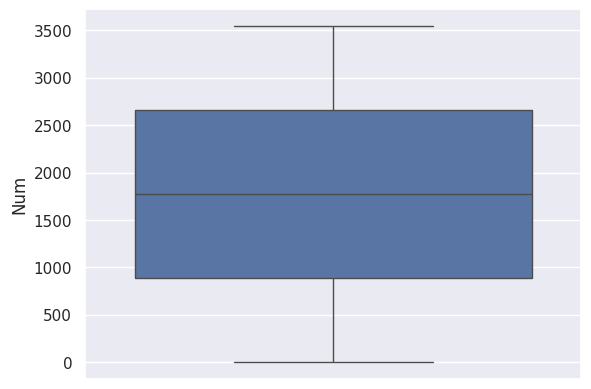

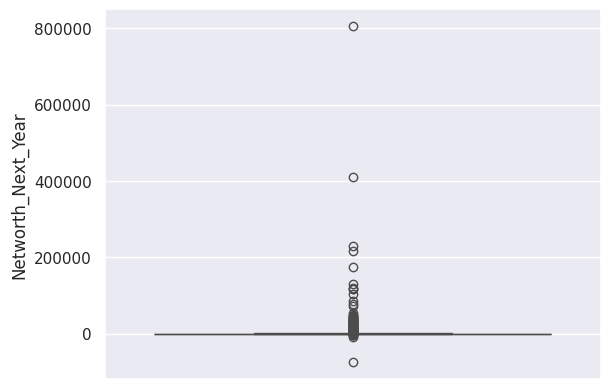

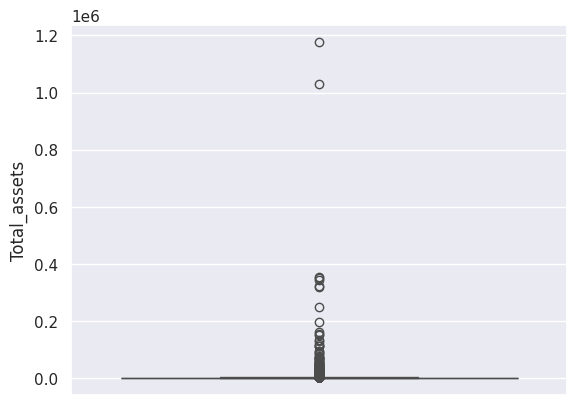

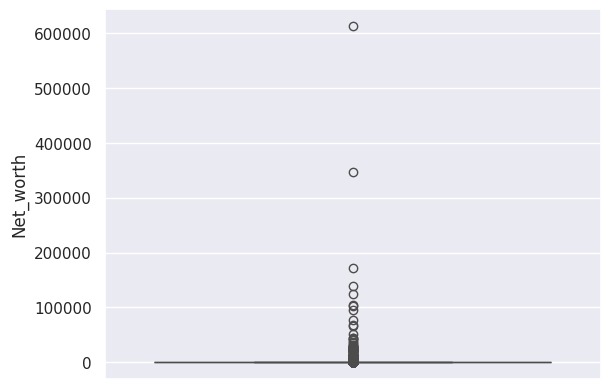

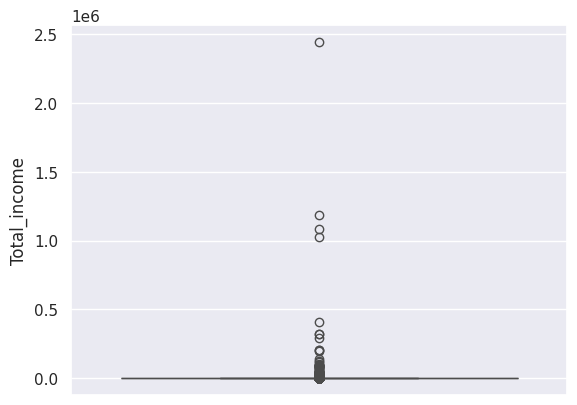

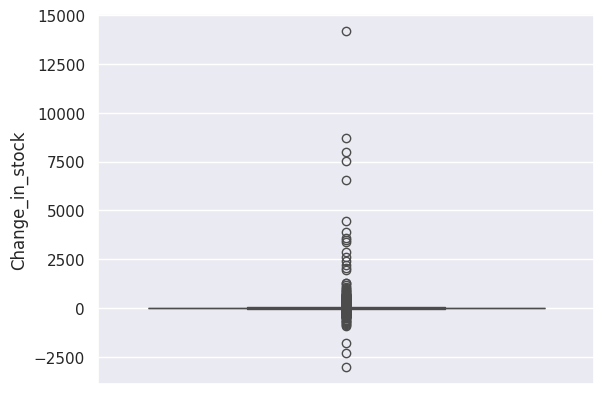

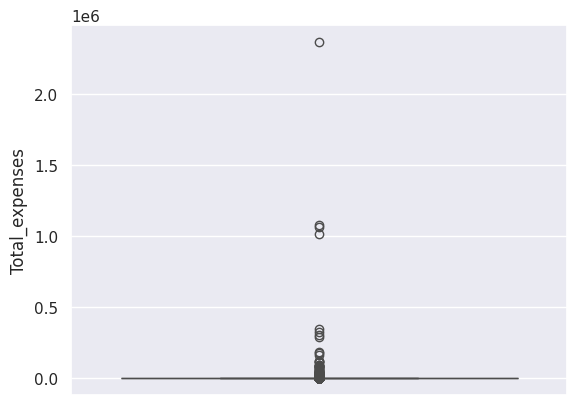

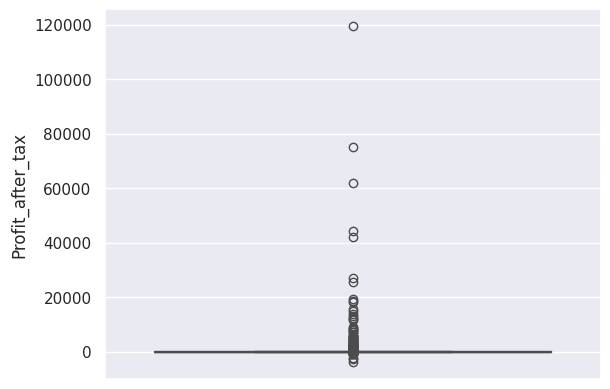

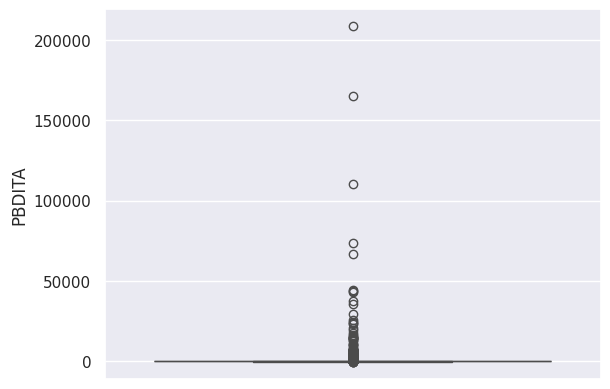

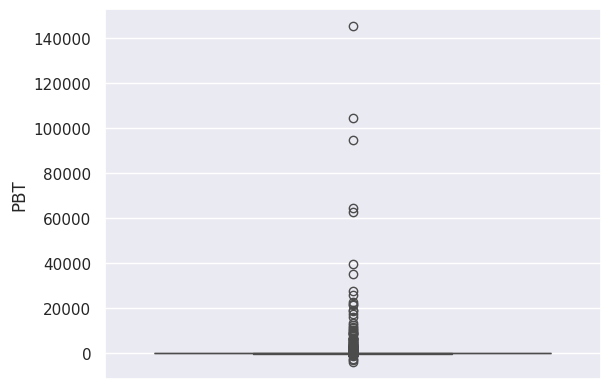

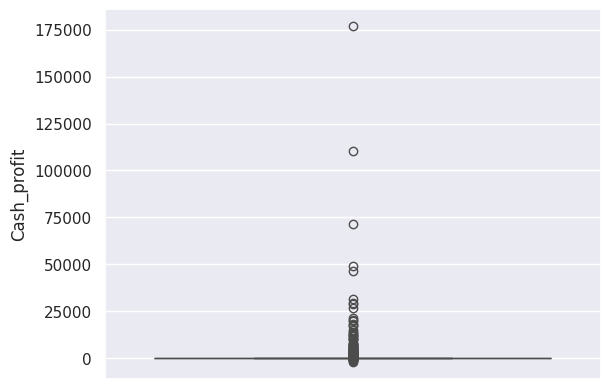

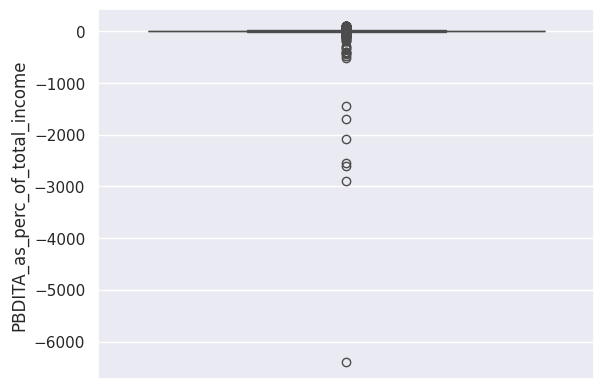

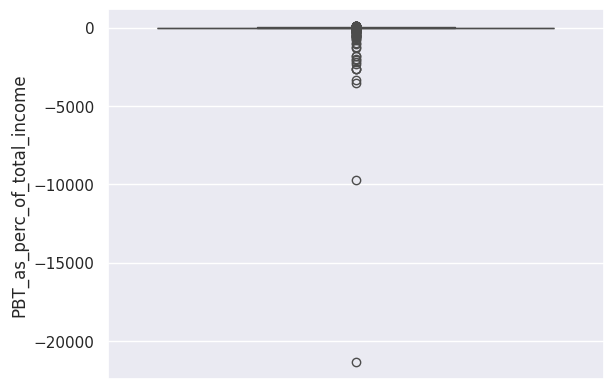

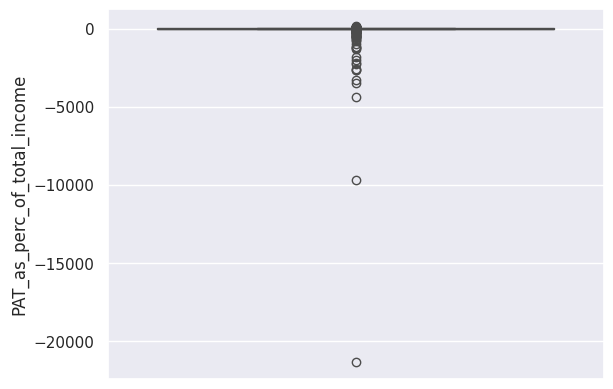

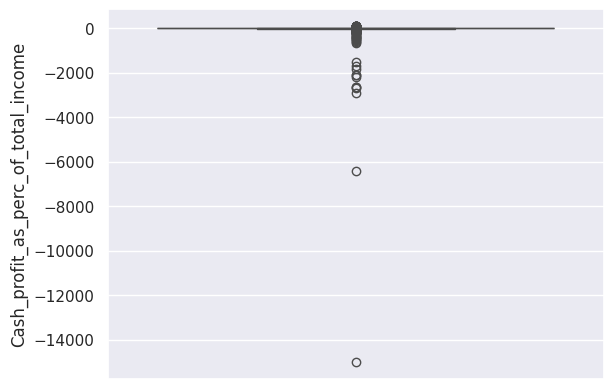

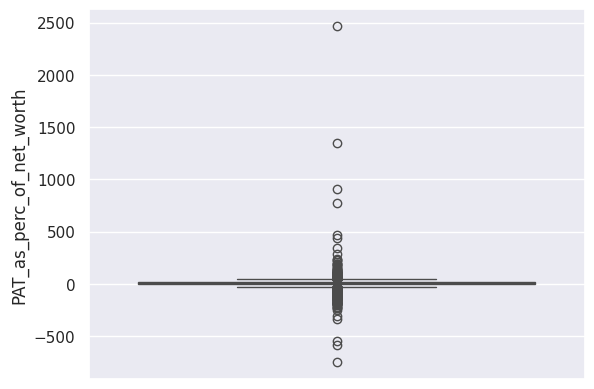

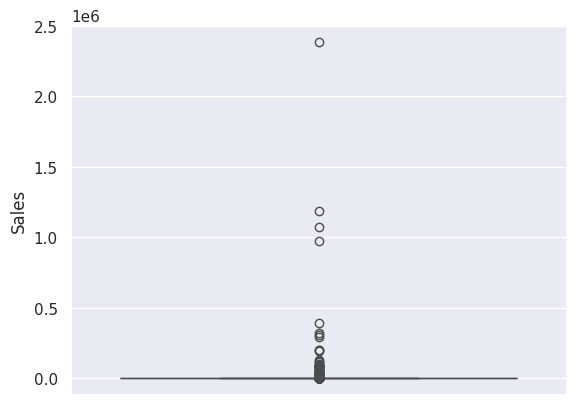

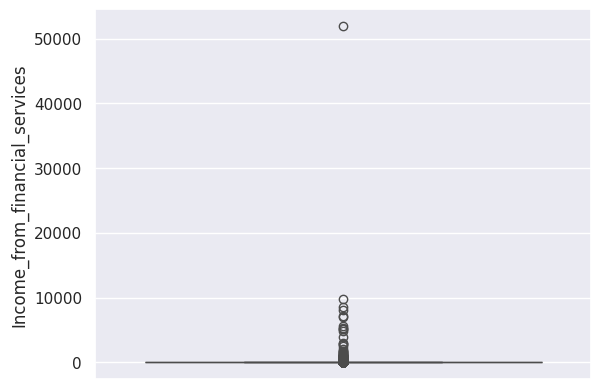

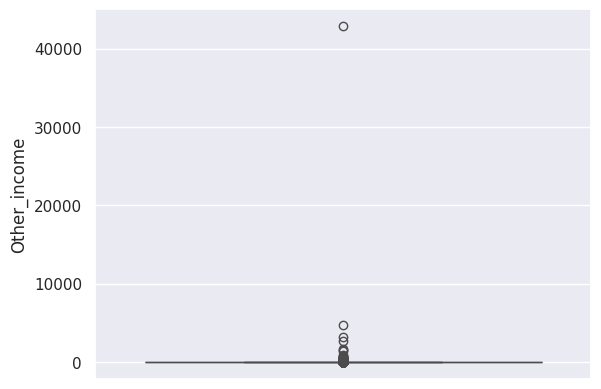

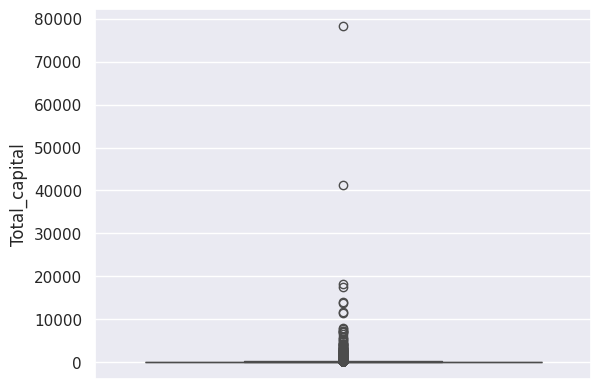

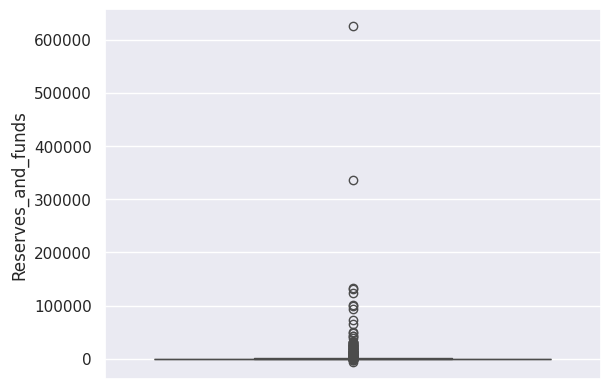

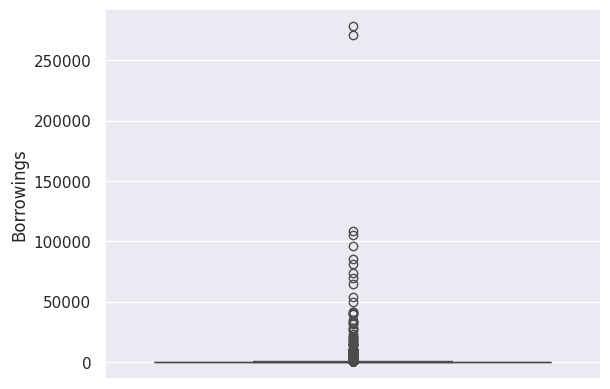

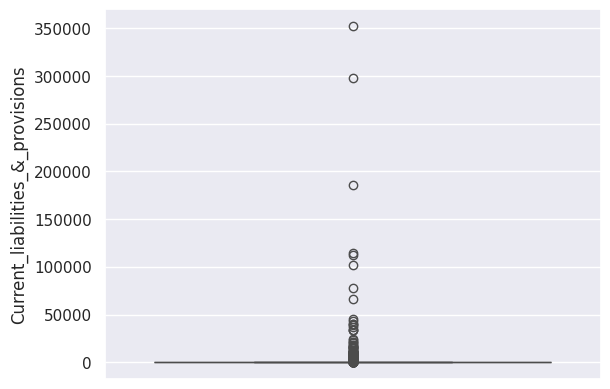

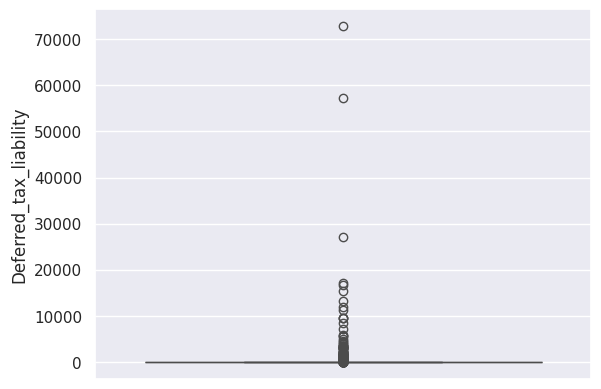

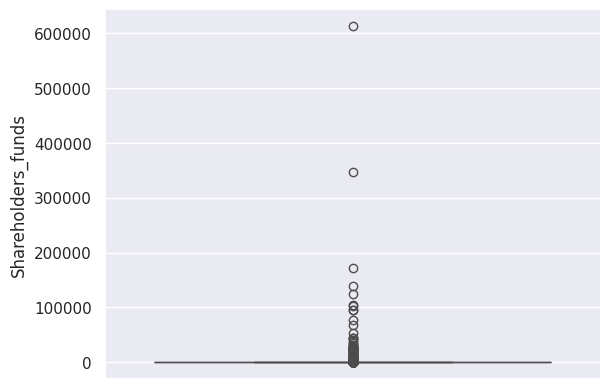

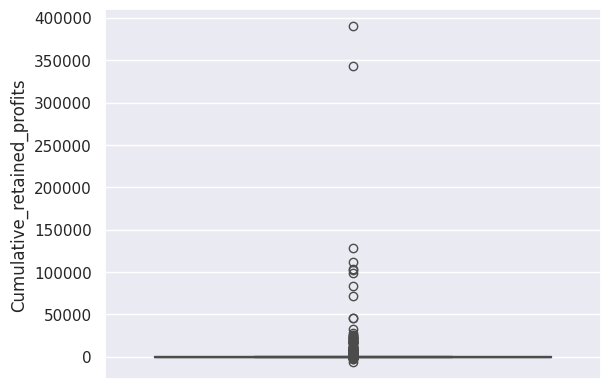

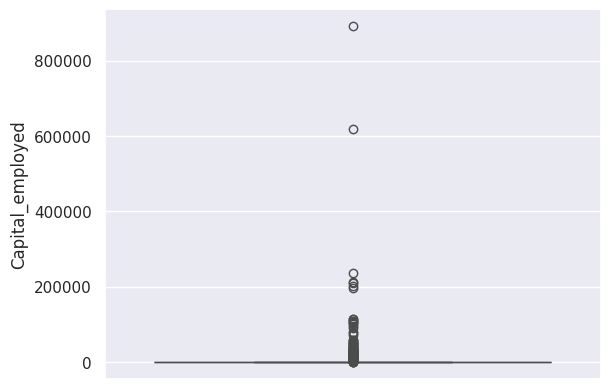

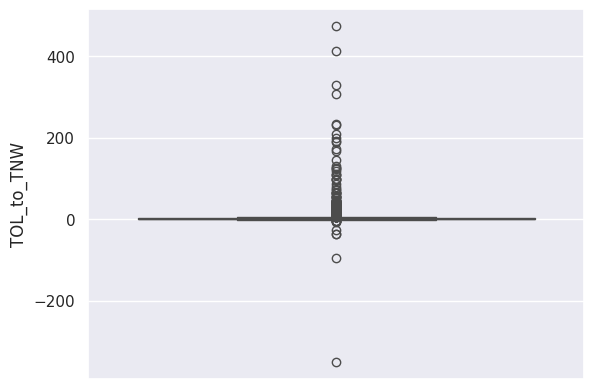

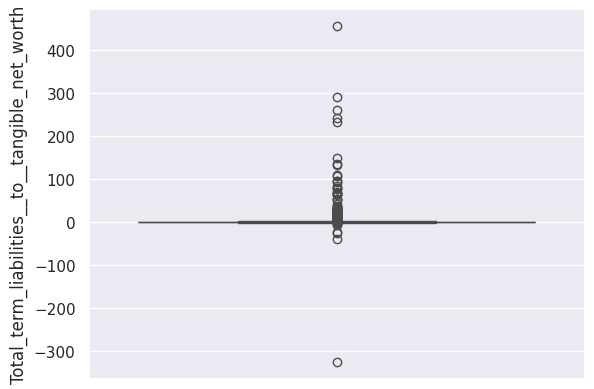

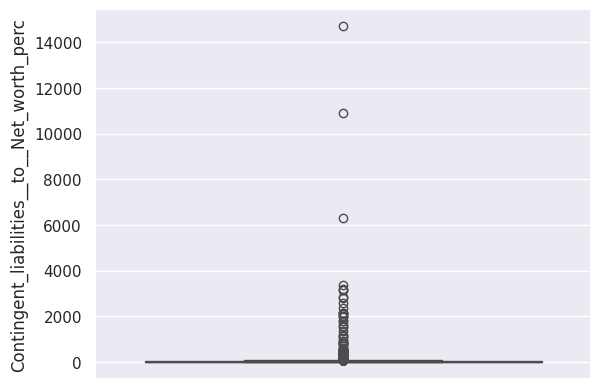

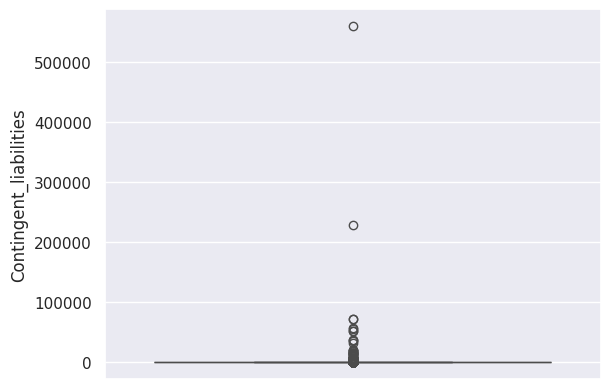

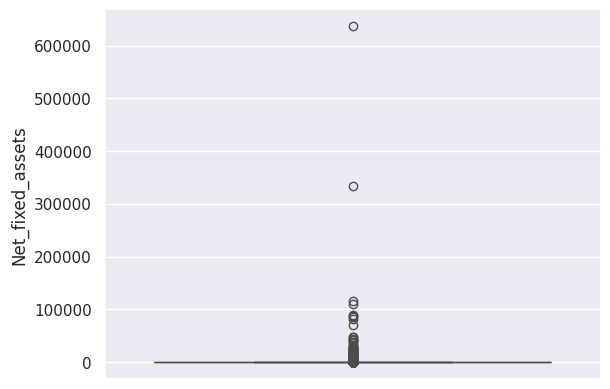

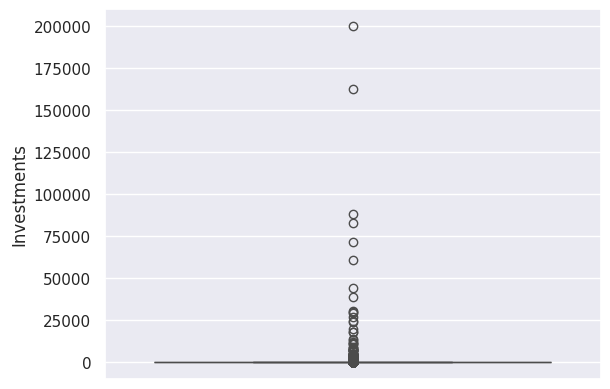

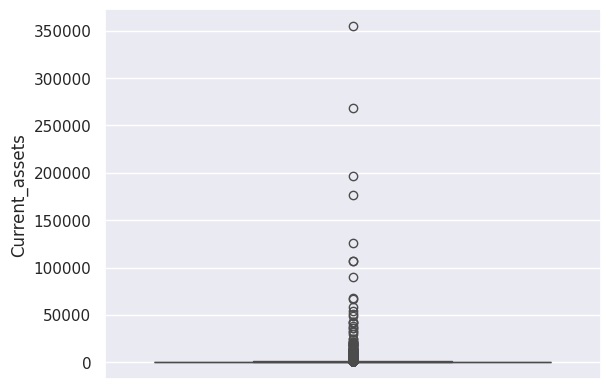

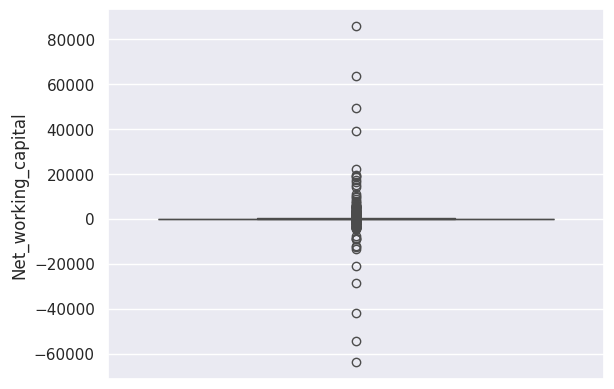

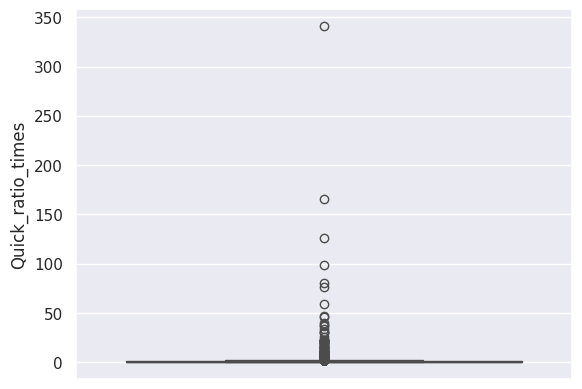

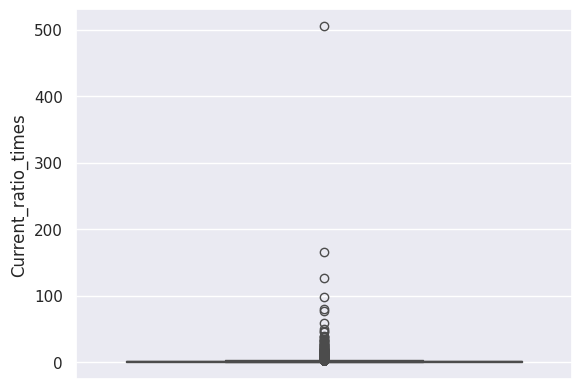

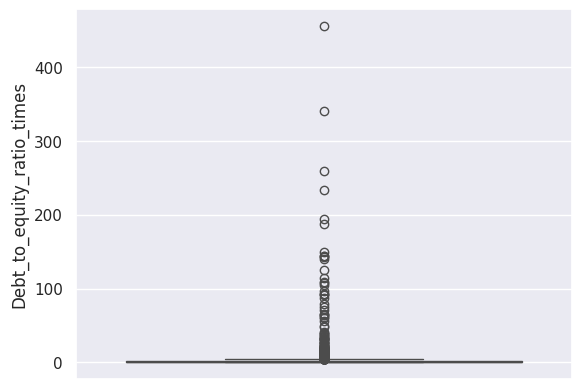

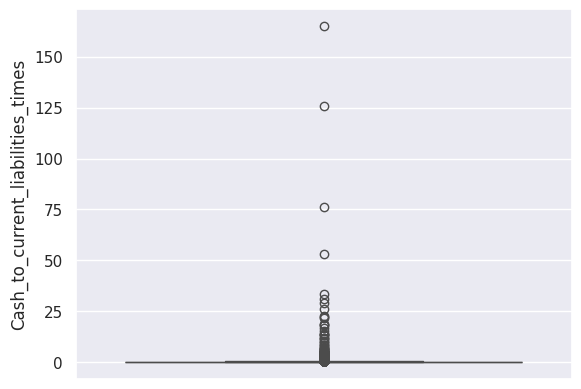

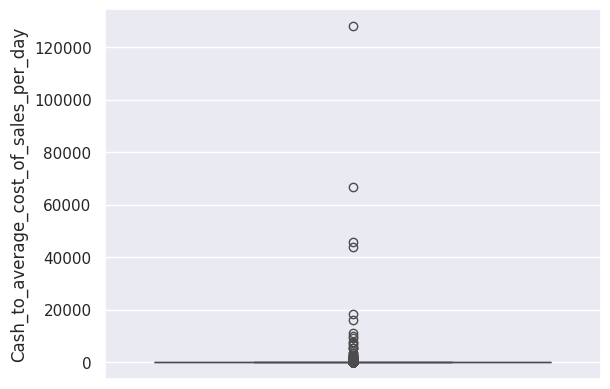

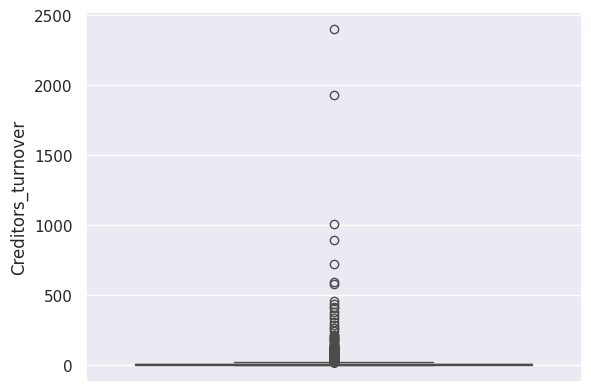

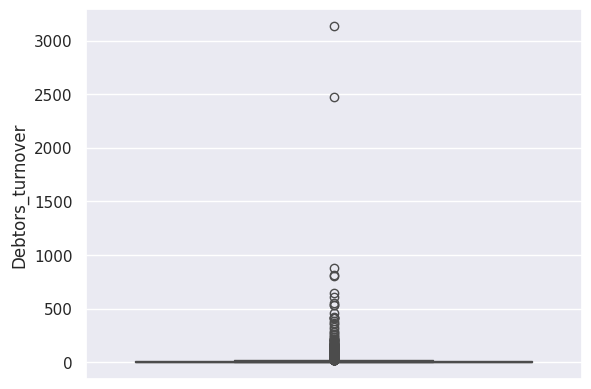

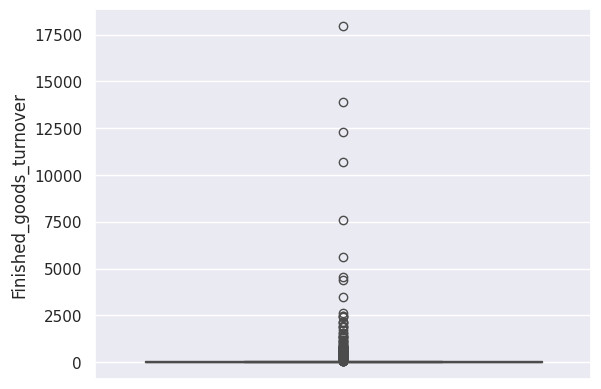

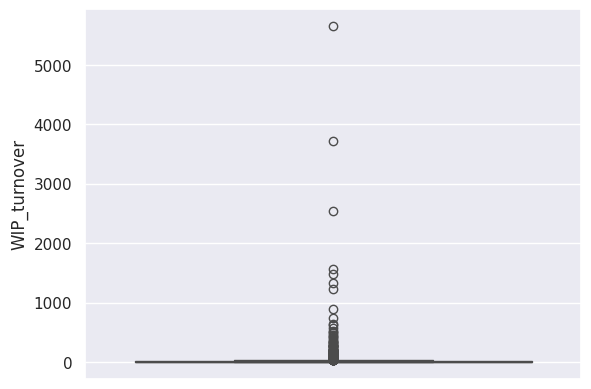

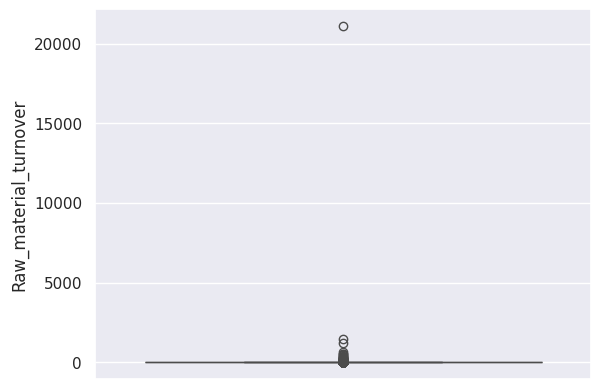

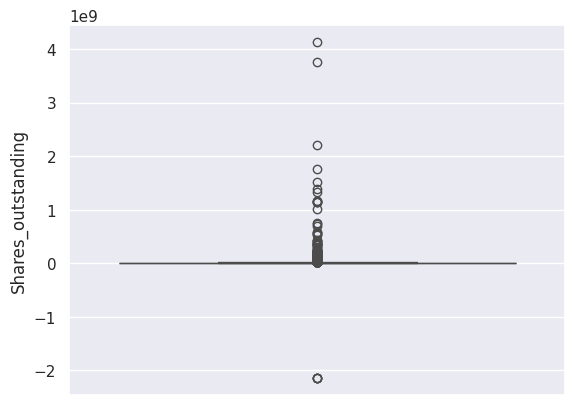

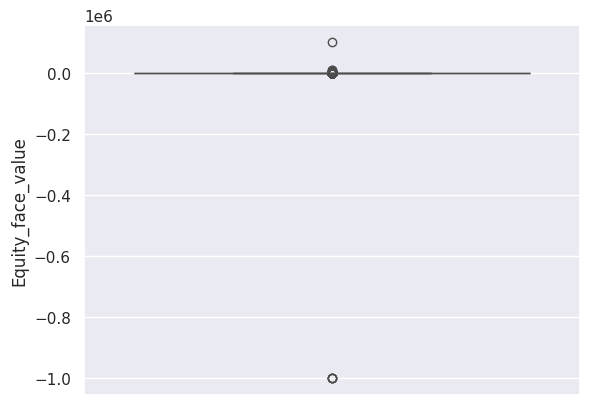

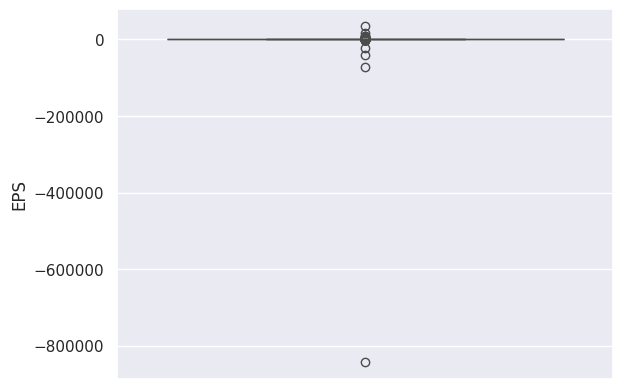

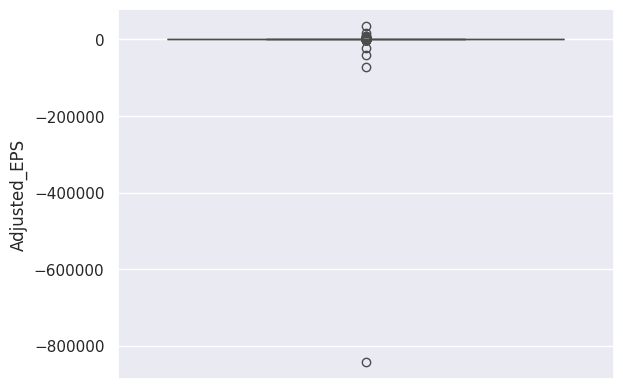

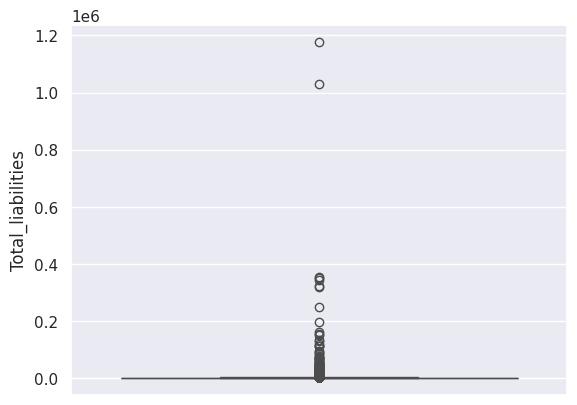

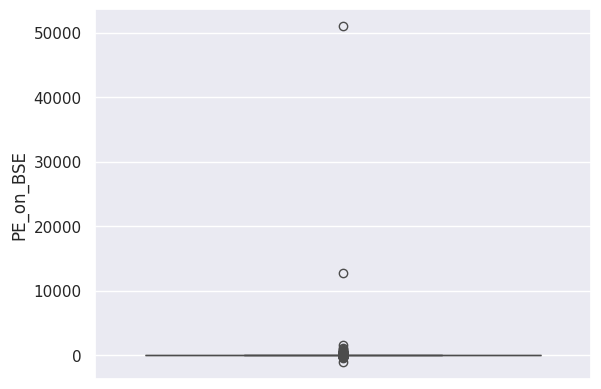

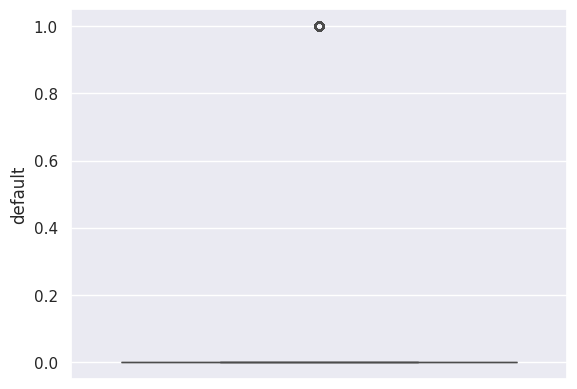

In [ ]:
## plot the boxplots for outliers

for col in list(company.select_dtypes(exclude = ['object']).columns)[0:]:

  if col != 'Deposits_accepted_by_commercial_banks':
    sns.boxplot(company[col])
    plt.show()

In [ ]:
company['Deposits_accepted_by_commercial_banks'].isnull().sum()/company.shape[0]*100

100.0

In [ ]:
## dropping all non significant columns

company_x = company_x.drop(['Num','Networth_Next_Year','Deposits_accepted_by_commercial_banks'],axis = 1)

In [ ]:
company_x

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Other_income,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Deferred_tax_liability,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Contingent_liabilities,Net_fixed_assets,Investments,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,1872.8,11.46,9.68,6.18,7.50,23.78,24458.0,158.0,297.2,423.8,6822.8,14.9,9965.9,284.9,7093.2,6263.3,7108.1,1.33,0.00,14.80,1049.7,1900.2,1069.6,13277.5,3588.5,1.18,1.37,0.00,0.43,68.21,3.62,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,158.6,18.53,12.33,7.54,10.38,38.08,1504.3,4.0,15.9,115.5,257.8,272.5,210.0,85.2,351.5,247.4,624.0,1.23,0.34,19.23,67.6,286.4,2.2,563.9,203.5,0.95,1.56,0.78,0.06,5.96,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,-1.38,-1.38,0.06,-6.35,475.6,1.5,0.2,81.4,19.2,35.4,96.8,NaN,100.6,32.4,136.0,1.44,0.29,45.83,46.1,38.7,4.3,167.5,59.6,1.11,1.55,0.35,0.21,17.07,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.5,2.2,NaN,NaN,NaN,2.7,2.2,2.7,0.00,0.00,0.00,NaN,2.5,NaN,0.2,0.2,NaN,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,0.40,0.35,0.75,5.25,1575.1,3.9,0.9,6.2,161.8,193.1,112.8,4.6,107.6,82.7,300.7,2.83,1.59,34.94,37.6,94.8,7.4,349.7,215.8,1.41,2.54,1.79,0.00,0.00,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,450.5,172.3,565.0,30.5,581.1,14.4,76.7,41.1,48.4,13.58,7.27,2.55,8.57,8.71,564.5,0.5,NaN,89.0,85.5,190.2,42.5,36.8,172.3,76.8,362.5,1.30,0.72,0.00,NaN,227.0,NaN,187.0,78.3,0.41,1.71,1.10,0.07,5.67,15.65,20.64,8.66,5.14,19.47,14904213.0,10.0,0.97,0.97,450.5,NaN
3537,97.6,82.0,75.8,-4.0,66.5,5.3,11.1,6.2,9.2,14.64,8.18,6.99,12.14,6.68,73.9,1.7,NaN,38.6,48.4,3.0,7.6,NaN,87.0,36.6,90.0,0.12,0.02,5.12,4.2,21.9,6.8,55.8,47.2,4.58,6.49,0.10,3.88,177.71,10.07,14.21,5.13,4.17,4.83,3362800.0,10.0,1.61,1.61,97.6,2.49
3538,902.9,209.1,1005.1,5.6,966.5,44.2,120.3,70.0,62.6,11.97,6.96,4.40,6.23,22.77,995.9,2.6,0.3,30.0,179.1,305.0,363.4,25.4,209.1,179.1,514.1,2.45,0.68,93.45,195.4,217.7,17.5,477.5,-49.5,0.59,0.91,1.46,0.05,11.05,3.96,3.76,33.03,11.68,4.63,3000000.0,10.0,13.10,13.10,902.9,12.62
3539,177.0,137.2,371.0,3.9,348.9,26.0,50.5,40.8,33.6,13.61,11.00,7.01,9.06,20.30,365.8,3.3,1.6,50.9,86.3,1.3,21.1,17.4,137.2,77.1,138.5,0.10,0.01,6.20,8.5,73.5,NaN,80.8,59.7,2.83,3.83,0.01,1.35,29.93,25.00,13.75,49.00,47.03,17.42,4422346.0,10.0,6.06,6.06,177.0,4.07


In [ ]:
company_y

,default
0,0
1,0
2,0
3,0
4,0
...,...
3536,0
3537,0
3538,0
3539,0


In [ ]:
company_sub1 = pd.concat([company_x,company_y],axis = 1)

In [ ]:
company_sub1.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Other_income,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Deferred_tax_liability,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Contingent_liabilities,Net_fixed_assets,Investments,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,1872.8,11.46,9.68,6.18,7.50,23.78,24458.0,158.0,297.2,423.8,6822.8,14.9,9965.9,284.9,7093.2,6263.3,7108.1,1.33,0.00,14.80,1049.7,1900.2,1069.6,13277.5,3588.5,1.18,1.37,0.00,0.43,68.21,3.62,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,0
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,158.6,18.53,12.33,7.54,10.38,38.08,1504.3,4.0,15.9,115.5,257.8,272.5,210.0,85.2,351.5,247.4,624.0,1.23,0.34,19.23,67.6,286.4,2.2,563.9,203.5,0.95,1.56,0.78,0.06,5.96,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,0


In [ ]:
## lets look at the missing value data in our dataset and visualise it

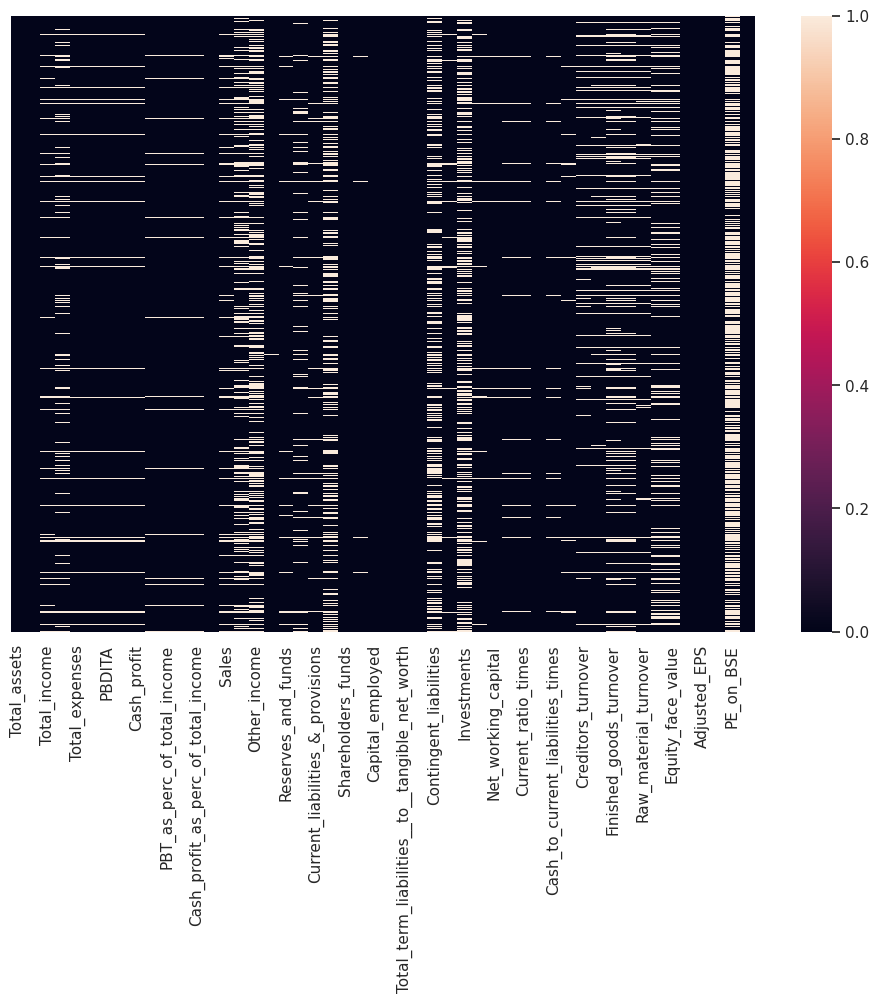

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(company_sub1.isnull(),yticklabels = False)
plt.show()

In [ ]:
company_sub1.isnull().sum()

,0
Total_assets,0
Net_worth,0
Total_income,198
Change_in_stock,458
Total_expenses,139
Profit_after_tax,131
PBDITA,131
PBT,131
Cash_profit,131
PBDITA_as_perc_of_total_income,68


In [ ]:
##handle missing values

# 1. drop columns where missing value is more than 30%

na_values = company_sub1.isnull().sum().sort_values(ascending = False).to_frame()/company_sub1.shape[0]*100

In [ ]:
drop_cols = na_values[na_values[0] >= 30].index.tolist()

In [ ]:
drop_cols

['PE_on_BSE',
 'Investments',
 'Other_income',
 'Contingent_liabilities',
 'Deferred_tax_liability']

In [ ]:
company_sub2 = company_sub1.drop(drop_cols,axis = 1)

In [ ]:
company_sub2

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,1872.8,11.46,9.68,6.18,7.50,23.78,24458.0,158.0,423.8,6822.8,14.9,9965.9,7093.2,6263.3,7108.1,1.33,0.00,14.80,1900.2,13277.5,3588.5,1.18,1.37,0.00,0.43,68.21,3.62,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,0
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,158.6,18.53,12.33,7.54,10.38,38.08,1504.3,4.0,115.5,257.8,272.5,210.0,351.5,247.4,624.0,1.23,0.34,19.23,286.4,563.9,203.5,0.95,1.56,0.78,0.06,5.96,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,0
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,-1.38,-1.38,0.06,-6.35,475.6,1.5,81.4,19.2,35.4,96.8,100.6,32.4,136.0,1.44,0.29,45.83,38.7,167.5,59.6,1.11,1.55,0.35,0.21,17.07,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,0
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.5,2.2,NaN,NaN,2.7,2.2,2.7,0.00,0.00,0.00,2.5,0.2,0.2,NaN,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,0
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,0.40,0.35,0.75,5.25,1575.1,3.9,6.2,161.8,193.1,112.8,107.6,82.7,300.7,2.83,1.59,34.94,94.8,349.7,215.8,1.41,2.54,1.79,0.00,0.00,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,450.5,172.3,565.0,30.5,581.1,14.4,76.7,41.1,48.4,13.58,7.27,2.55,8.57,8.71,564.5,0.5,89.0,85.5,190.2,42.5,172.3,76.8,362.5,1.30,0.72,0.00,227.0,187.0,78.3,0.41,1.71,1.10,0.07,5.67,15.65,20.64,8.66,5.14,19.47,14904213.0,10.0,0.97,0.97,450.5,0
3537,97.6,82.0,75.8,-4.0,66.5,5.3,11.1,6.2,9.2,14.64,8.18,6.99,12.14,6.68,73.9,1.7,38.6,48.4,3.0,7.6,87.0,36.6,90.0,0.12,0.02,5.12,21.9,55.8,47.2,4.58,6.49,0.10,3.88,177.71,10.07,14.21,5.13,4.17,4.83,3362800.0,10.0,1.61,1.61,97.6,0
3538,902.9,209.1,1005.1,5.6,966.5,44.2,120.3,70.0,62.6,11.97,6.96,4.40,6.23,22.77,995.9,2.6,30.0,179.1,305.0,363.4,209.1,179.1,514.1,2.45,0.68,93.45,217.7,477.5,-49.5,0.59,0.91,1.46,0.05,11.05,3.96,3.76,33.03,11.68,4.63,3000000.0,10.0,13.10,13.10,902.9,0
3539,177.0,137.2,371.0,3.9,348.9,26.0,50.5,40.8,33.6,13.61,11.00,7.01,9.06,20.30,365.8,3.3,50.9,86.3,1.3,21.1,137.2,77.1,138.5,0.10,0.01,6.20,73.5,80.8,59.7,2.83,3.83,0.01,1.35,29.93,25.00,13.75,49.00,47.03,17.42,4422346.0,10.0,6.06,6.06,177.0,0


In [ ]:
predictors = company_sub2.drop('default',axis = 1)
response = company_sub2['default']

In [ ]:
###feature scalling of the variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors),columns = predictors.columns)

In [ ]:
scaled_predictors

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,0.454327,0.433090,0.366109,0.441112,0.365797,0.413139,0.403709,0.493965,0.350385,0.046834,0.063377,0.059058,0.051652,0.207414,0.362260,0.069201,0.123156,0.423236,-0.127570,0.945579,0.429291,0.531384,0.226894,-0.137342,-0.124831,-0.103327,0.053463,1.182998,1.171431,-0.028646,-0.075239,-0.185659,-0.014398,-0.032854,-0.173402,-0.157168,0.189612,-0.040727,-0.030239,0.122752,0.035838,0.017941,0.016032,0.454327
1,-0.080809,-0.070548,-0.054882,0.002749,-0.052961,-0.052925,-0.052195,-0.047470,-0.055245,0.094897,0.069607,0.062222,0.061109,0.426944,-0.055412,-0.068921,-0.060100,-0.067761,-0.097895,-0.076548,-0.072197,-0.063606,-0.080905,-0.142497,-0.101813,-0.091631,-0.067967,-0.072008,0.022047,-0.058406,-0.056439,-0.133561,-0.102595,-0.055519,-0.082784,-0.135127,-0.121765,-0.135352,-0.020273,-0.063553,0.035838,0.016149,0.016233,-0.080809
2,-0.103679,-0.089292,-0.073744,-0.105991,-0.071372,-0.092678,-0.101232,-0.094841,-0.092703,-0.022778,0.037377,0.041466,0.027220,-0.255136,-0.074130,-0.071163,-0.080369,-0.085606,-0.125209,-0.088408,-0.090860,-0.084870,-0.104070,-0.131671,-0.105198,-0.021406,-0.086605,-0.111138,-0.026814,-0.037704,-0.057429,-0.162282,-0.066839,-0.051474,-0.149061,-0.142633,-0.130070,-0.183426,NaN,-0.084103,0.035838,0.015415,0.015499,-0.103679
3,-0.111110,-0.096606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031071,0.040621,0.044677,0.027023,-0.157652,NaN,NaN,-0.128456,-0.086877,NaN,NaN,-0.098142,-0.087857,-0.110398,-0.205912,-0.124831,-0.142399,-0.089329,-0.127653,-0.046984,NaN,NaN,-0.185659,NaN,NaN,-0.226483,-0.203040,NaN,NaN,-0.050729,-0.133029,0.035838,0.015450,0.015534,-0.111110
4,-0.095745,-0.088769,-0.053928,-0.132779,-0.051016,-0.088729,-0.096774,-0.091707,-0.089958,-0.017747,0.041561,0.045492,0.029486,-0.077055,-0.054123,-0.069011,-0.125068,-0.074941,-0.107042,-0.086732,-0.090339,-0.079895,-0.096252,-0.060007,-0.017188,-0.050156,-0.082384,-0.093153,0.026224,0.001113,0.040527,-0.066102,-0.116898,-0.057689,-0.035861,-0.090328,-0.124321,-0.132637,-0.005470,-0.129601,0.035838,0.016005,0.016089,-0.095745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,-0.096649,-0.083936,-0.072168,-0.024947,-0.069441,-0.085824,-0.088689,-0.083253,-0.081321,0.061246,0.057712,0.050611,0.055166,-0.023938,-0.072513,-0.072060,-0.075852,-0.080647,-0.107376,-0.094097,-0.085527,-0.080479,-0.093318,-0.138889,-0.076087,-0.142399,-0.072436,-0.109213,-0.020465,-0.128277,-0.041597,-0.112188,-0.100211,-0.055625,0.002996,0.042878,-0.131039,-0.150913,0.001014,-0.043285,0.035838,0.015518,0.015602,-0.096649
3537,-0.108045,-0.090681,-0.080955,-0.103267,-0.079147,-0.088794,-0.100294,-0.091732,-0.090597,0.068452,0.059851,0.060942,0.066889,-0.055102,-0.081440,-0.070984,-0.105810,-0.083422,-0.128941,-0.097753,-0.091872,-0.084454,-0.106254,-0.199726,-0.123477,-0.128882,-0.087869,-0.122165,-0.031025,0.411279,0.431361,-0.178979,0.807984,0.007015,-0.078825,-0.033733,-0.136937,-0.157337,-0.037893,-0.113025,0.035838,0.015563,0.015647,-0.108045
3538,-0.082040,-0.08

In [ ]:
company_sub3 = pd.concat([scaled_predictors,response],axis = 1)

In [ ]:
company_sub3

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,0.454327,0.433090,0.366109,0.441112,0.365797,0.413139,0.403709,0.493965,0.350385,0.046834,0.063377,0.059058,0.051652,0.207414,0.362260,0.069201,0.123156,0.423236,-0.127570,0.945579,0.429291,0.531384,0.226894,-0.137342,-0.124831,-0.103327,0.053463,1.182998,1.171431,-0.028646,-0.075239,-0.185659,-0.014398,-0.032854,-0.173402,-0.157168,0.189612,-0.040727,-0.030239,0.122752,0.035838,0.017941,0.016032,0.454327,0
1,-0.080809,-0.070548,-0.054882,0.002749,-0.052961,-0.052925,-0.052195,-0.047470,-0.055245,0.094897,0.069607,0.062222,0.061109,0.426944,-0.055412,-0.068921,-0.060100,-0.067761,-0.097895,-0.076548,-0.072197,-0.063606,-0.080905,-0.142497,-0.101813,-0.091631,-0.067967,-0.072008,0.022047,-0.058406,-0.056439,-0.133561,-0.102595,-0.055519,-0.082784,-0.135127,-0.121765,-0.135352,-0.020273,-0.063553,0.035838,0.016149,0.016233,-0.080809,0
2,-0.103679,-0.089292,-0.073744,-0.105991,-0.071372,-0.092678,-0.101232,-0.094841,-0.092703,-0.022778,0.037377,0.041466,0.027220,-0.255136,-0.074130,-0.071163,-0.080369,-0.085606,-0.125209,-0.088408,-0.090860,-0.084870,-0.104070,-0.131671,-0.105198,-0.021406,-0.086605,-0.111138,-0.026814,-0.037704,-0.057429,-0.162282,-0.066839,-0.051474,-0.149061,-0.142633,-0.130070,-0.183426,NaN,-0.084103,0.035838,0.015415,0.015499,-0.103679,0
3,-0.111110,-0.096606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031071,0.040621,0.044677,0.027023,-0.157652,NaN,NaN,-0.128456,-0.086877,NaN,NaN,-0.098142,-0.087857,-0.110398,-0.205912,-0.124831,-0.142399,-0.089329,-0.127653,-0.046984,NaN,NaN,-0.185659,NaN,NaN,-0.226483,-0.203040,NaN,NaN,-0.050729,-0.133029,0.035838,0.015450,0.015534,-0.111110,0
4,-0.095745,-0.088769,-0.053928,-0.132779,-0.051016,-0.088729,-0.096774,-0.091707,-0.089958,-0.017747,0.041561,0.045492,0.029486,-0.077055,-0.054123,-0.069011,-0.125068,-0.074941,-0.107042,-0.086732,-0.090339,-0.079895,-0.096252,-0.060007,-0.017188,-0.050156,-0.082384,-0.093153,0.026224,0.001113,0.040527,-0.066102,-0.116898,-0.057689,-0.035861,-0.090328,-0.124321,-0.132637,-0.005470,-0.129601,0.035838,0.016005,0.016089,-0.095745,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,-0.096649,-0.083936,-0.072168,-0.024947,-0.069441,-0.085824,-0.088689,-0.083253,-0.081321,0.061246,0.057712,0.050611,0.055166,-0.023938,-0.072513,-0.072060,-0.075852,-0.080647,-0.107376,-0.094097,-0.085527,-0.080479,-0.093318,-0.138889,-0.076087,-0.142399,-0.072436,-0.109213,-0.020465,-0.128277,-0.041597,-0.112188,-0.100211,-0.055625,0.002996,0.042878,-0.131039,-0.150913,0.001014,-0.043285,0.035838,0.015518,0.015602,-0.096649,0
3537,-0.108045,-0.090681,-0.080955,-0.103267,-0.079147,-0.088794,-0.100294,-0.091732,-0.090597,0.068452,0.059851,0.060942,0.066889,-0.055102,-0.081440,-0.070984,-0.105810,-0.083422,-0.128941,-0.097753,-0.091872,-0.084454,-0.106254,-0.199726,-0.123477,-0.128882,-0.087869,-0.122165,-0.031025,0.411279,0.431361,-0.178979,0.807984,0.007015,-0.078825,-0.033733,-0.136937,-0.157337,-0.037893,-0.113025,0.035838,0.015563,0.015647,-0.108

In [ ]:
## impute the missing values

## use KNNImputer method

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 5)

company_imputed = pd.DataFrame(imputer.fit_transform(company_sub3),columns = company_sub3.columns)

In [ ]:
company_imputed

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,0.454327,0.433090,0.366109,0.441112,0.365797,0.413139,0.403709,0.493965,0.350385,0.046834,0.063377,0.059058,0.051652,0.207414,0.362260,0.069201,0.123156,0.423236,-0.127570,0.945579,0.429291,0.531384,0.226894,-0.137342,-0.124831,-0.103327,0.053463,1.182998,1.171431,-0.028646,-0.075239,-0.185659,-0.014398,-0.032854,-0.173402,-0.157168,0.189612,-0.040727,-0.030239,0.122752,0.035838,0.017941,0.016032,0.454327,0.0
1,-0.080809,-0.070548,-0.054882,0.002749,-0.052961,-0.052925,-0.052195,-0.047470,-0.055245,0.094897,0.069607,0.062222,0.061109,0.426944,-0.055412,-0.068921,-0.060100,-0.067761,-0.097895,-0.076548,-0.072197,-0.063606,-0.080905,-0.142497,-0.101813,-0.091631,-0.067967,-0.072008,0.022047,-0.058406,-0.056439,-0.133561,-0.102595,-0.055519,-0.082784,-0.135127,-0.121765,-0.135352,-0.020273,-0.063553,0.035838,0.016149,0.016233,-0.080809,0.0
2,-0.103679,-0.089292,-0.073744,-0.105991,-0.071372,-0.092678,-0.101232,-0.094841,-0.092703,-0.022778,0.037377,0.041466,0.027220,-0.255136,-0.074130,-0.071163,-0.080369,-0.085606,-0.125209,-0.088408,-0.090860,-0.084870,-0.104070,-0.131671,-0.105198,-0.021406,-0.086605,-0.111138,-0.026814,-0.037704,-0.057429,-0.162282,-0.066839,-0.051474,-0.149061,-0.142633,-0.130070,-0.183426,-0.021501,-0.084103,0.035838,0.015415,0.015499,-0.103679,0.0
3,-0.111110,-0.096606,-0.082301,-0.098727,-0.080395,-0.090524,-0.102258,-0.093238,-0.092774,-0.031071,0.040621,0.044677,0.027023,-0.157652,-0.082652,-0.072329,-0.128456,-0.086877,-0.129250,-0.098537,-0.098142,-0.087857,-0.110398,-0.205912,-0.124831,-0.142399,-0.089329,-0.127653,-0.046984,0.310355,0.184987,-0.185659,0.359846,0.048628,-0.226483,-0.203040,-0.144828,-0.184883,-0.050729,-0.133029,0.035838,0.015450,0.015534,-0.111110,0.0
4,-0.095745,-0.088769,-0.053928,-0.132779,-0.051016,-0.088729,-0.096774,-0.091707,-0.089958,-0.017747,0.041561,0.045492,0.029486,-0.077055,-0.054123,-0.069011,-0.125068,-0.074941,-0.107042,-0.086732,-0.090339,-0.079895,-0.096252,-0.060007,-0.017188,-0.050156,-0.082384,-0.093153,0.026224,0.001113,0.040527,-0.066102,-0.116898,-0.057689,-0.035861,-0.090328,-0.124321,-0.132637,-0.005470,-0.129601,0.035838,0.016005,0.016089,-0.095745,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,-0.096649,-0.083936,-0.072168,-0.024947,-0.069441,-0.085824,-0.088689,-0.083253,-0.081321,0.061246,0.057712,0.050611,0.055166,-0.023938,-0.072513,-0.072060,-0.075852,-0.080647,-0.107376,-0.094097,-0.085527,-0.080479,-0.093318,-0.138889,-0.076087,-0.142399,-0.072436,-0.109213,-0.020465,-0.128277,-0.041597,-0.112188,-0.100211,-0.055625,0.002996,0.042878,-0.131039,-0.150913,0.001014,-0.043285,0.035838,0.015518,0.015602,-0.096649,0.0
3537,-0.108045,-0.090681,-0.080955,-0.103267,-0.079147,-0.088794,-0.100294,-0.091732,-0.090597,0.068452,0.059851,0.060942,0.066889,-0.055102,-0.081440,-0.070984,-0.105810,-0.083422,-0.128941,-0.097753,-0.091872,-0.084454,-0.106254,-0.199726,-0.123477,-0.128882,-0.087869,-0.122165,-0.031025,0.411279,0.431361,-0.17

In [ ]:
company_imputed.isnull().sum()

,0
Total_assets,0
Net_worth,0
Total_income,0
Change_in_stock,0
Total_expenses,0
Profit_after_tax,0
PBDITA,0
PBT,0
Cash_profit,0
PBDITA_as_perc_of_total_income,0


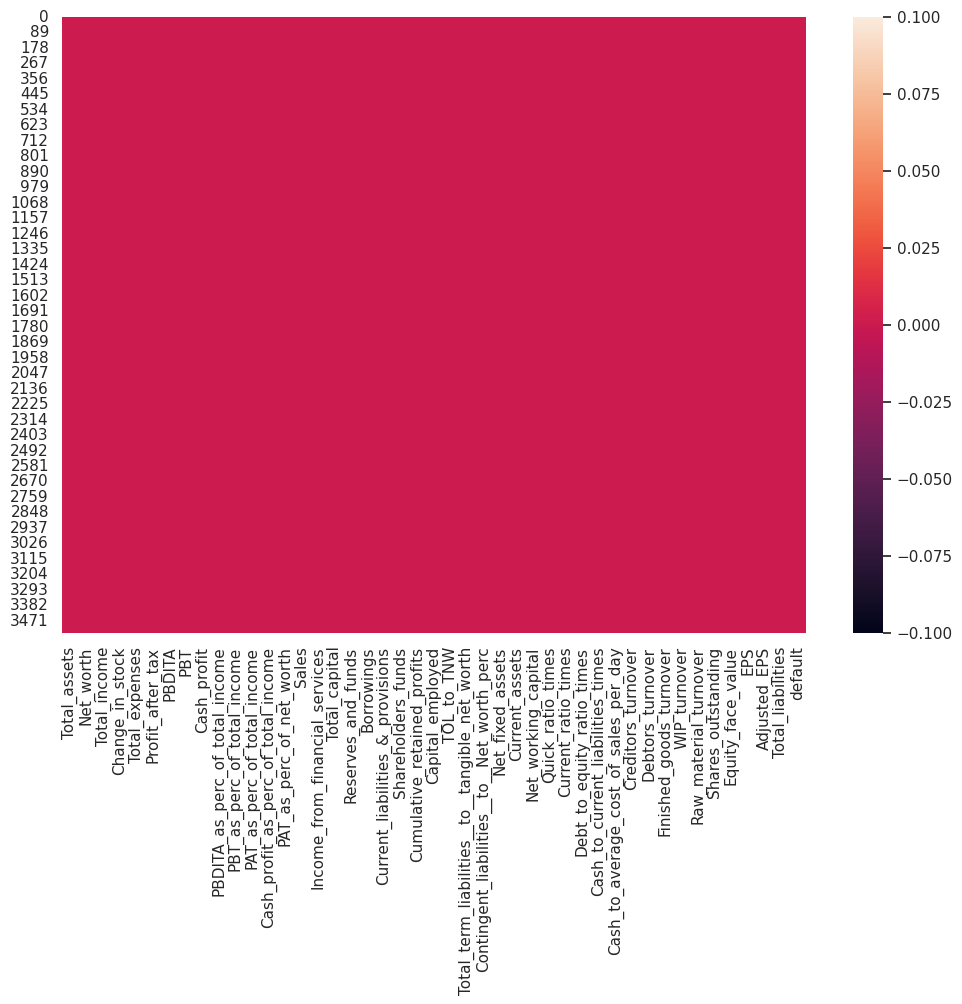

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(company_imputed.isnull())
plt.show()

In [ ]:
## automation EDA

In [ ]:
# ! pip install pandas-profiling

In [ ]:
"""from pandas_profiling import ProfileReport
profile = ProfileReport(company)

profile.to_file(output_file = 'output.html')"""

"from pandas_profiling import ProfileReport\nprofile = ProfileReport(company)\n\nprofile.to_file(output_file = 'output.html')"

In [ ]:
##dtale
# !pip install dtale

In [ ]:
# import dtale

In [ ]:
# dtale.show(company)

In [ ]:
company_imputed.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_financial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_&_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,0.454327,0.433090,0.366109,0.441112,0.365797,0.413139,0.403709,0.493965,0.350385,0.046834,0.063377,0.059058,0.051652,0.207414,0.362260,0.069201,0.123156,0.423236,-0.127570,0.945579,0.429291,0.531384,0.226894,-0.137342,-0.124831,-0.103327,0.053463,1.182998,1.171431,-0.028646,-0.075239,-0.185659,-0.014398,-0.032854,-0.173402,-0.157168,0.189612,-0.040727,-0.030239,0.122752,0.035838,0.017941,0.016032,0.454327,0.0
1,-0.080809,-0.070548,-0.054882,0.002749,-0.052961,-0.052925,-0.052195,-0.047470,-0.055245,0.094897,0.069607,0.062222,0.061109,0.426944,-0.055412,-0.068921,-0.060100,-0.067761,-0.097895,-0.076548,-0.072197,-0.063606,-0.080905,-0.142497,-0.101813,-0.091631,-0.067967,-0.072008,0.022047,-0.058406,-0.056439,-0.133561,-0.102595,-0.055519,-0.082784,-0.135127,-0.121765,-0.135352,-0.020273,-0.063553,0.035838,0.016149,0.016233,-0.080809,0.0
2,-0.103679,-0.089292,-0.073744,-0.105991,-0.071372,-0.092678,-0.101232,-0.094841,-0.092703,-0.022778,0.037377,0.041466,0.027220,-0.255136,-0.074130,-0.071163,-0.080369,-0.085606,-0.125209,-0.088408,-0.090860,-0.084870,-0.104070,-0.131671,-0.105198,-0.021406,-0.086605,-0.111138,-0.026814,-0.037704,-0.057429,-0.162282,-0.066839,-0.051474,-0.149061,-0.142633,-0.130070,-0.183426,-0.021501,-0.084103,0.035838,0.015415,0.015499,-0.103679,0.0
3,-0.111110,-0.096606,-0.082301,-0.098727,-0.080395,-0.090524,-0.102258,-0.093238,-0.092774,-0.031071,0.040621,0.044677,0.027023,-0.157652,-0.082652,-0.072329,-0.128456,-0.086877,-0.129250,-0.098537,-0.098142,-0.087857,-0.110398,-0.205912,-0.124831,-0.142399,-0.089329,-0.127653,-0.046984,0.310355,0.184987,-0.185659,0.359846,0.048628,-0.226483,-0.203040,-0.144828,-0.184883,-0.050729,-0.133029,0.035838,0.015450,0.015534,-0.111110,0.0
4,-0.095745,-0.088769,-0.053928,-0.132779,-0.051016,-0.088729,-0.096774,-0.091707,-0.089958,-0.017747,0.041561,0.045492,0.029486,-0.077055,-0.054123,-0.069011,-0.125068,-0.074941,-0.107042,-0.086732,-0.090339,-0.079895,-0.096252,-0.060007,-0.017188,-0.050156,-0.082384,-0.093153,0.026224,0.001113,0.040527,-0.066102,-0.116898,-0.057689,-0.035861,-0.090328,-0.124321,-0.132637,-0.005470,-0.129601,0.035838,0.016005,0.016089,-0.095745,0.0


In [ ]:
company_imputed.default.value_counts(normalize = True)

,proportion
default,
0.0,0.931375
1.0,0.068625


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(company_imputed.drop('default',axis = 1),company_imputed['default'],
                                                 random_state = 42)

In [ ]:
# print(y_test)
x_train.shape, x_test.shape

((2655, 44), (886, 44))

In [ ]:
y_train.value_counts()

,count
default,
0.0,2468
1.0,187


In [ ]:
# there is a huge difference b/w the occurrence of two classes and this is known as class imbalance

In [ ]:
company_imputed['default'] = np.where(company_imputed['default'] == 0.0,0,1)

In [ ]:
predictors = company_imputed.drop('default',axis = 1)
response = company_imputed['default']


In [ ]:
##SMOTE technique to handle oversampling

In [ ]:
import imblearn

from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 33)

x_res, y_res = sm.fit_resample(x_train,y_train)

# x_smote,y_smote = sm.fit_resample(predictors,response)

In [ ]:
x_smote,y_smote = sm.fit_resample(predictors,response)

In [ ]:
y_res.value_counts()

,count
default,
0.0,2468
1.0,2468


# Feature Selection

In [ ]:
# technique 1 - inspect correlation analysis

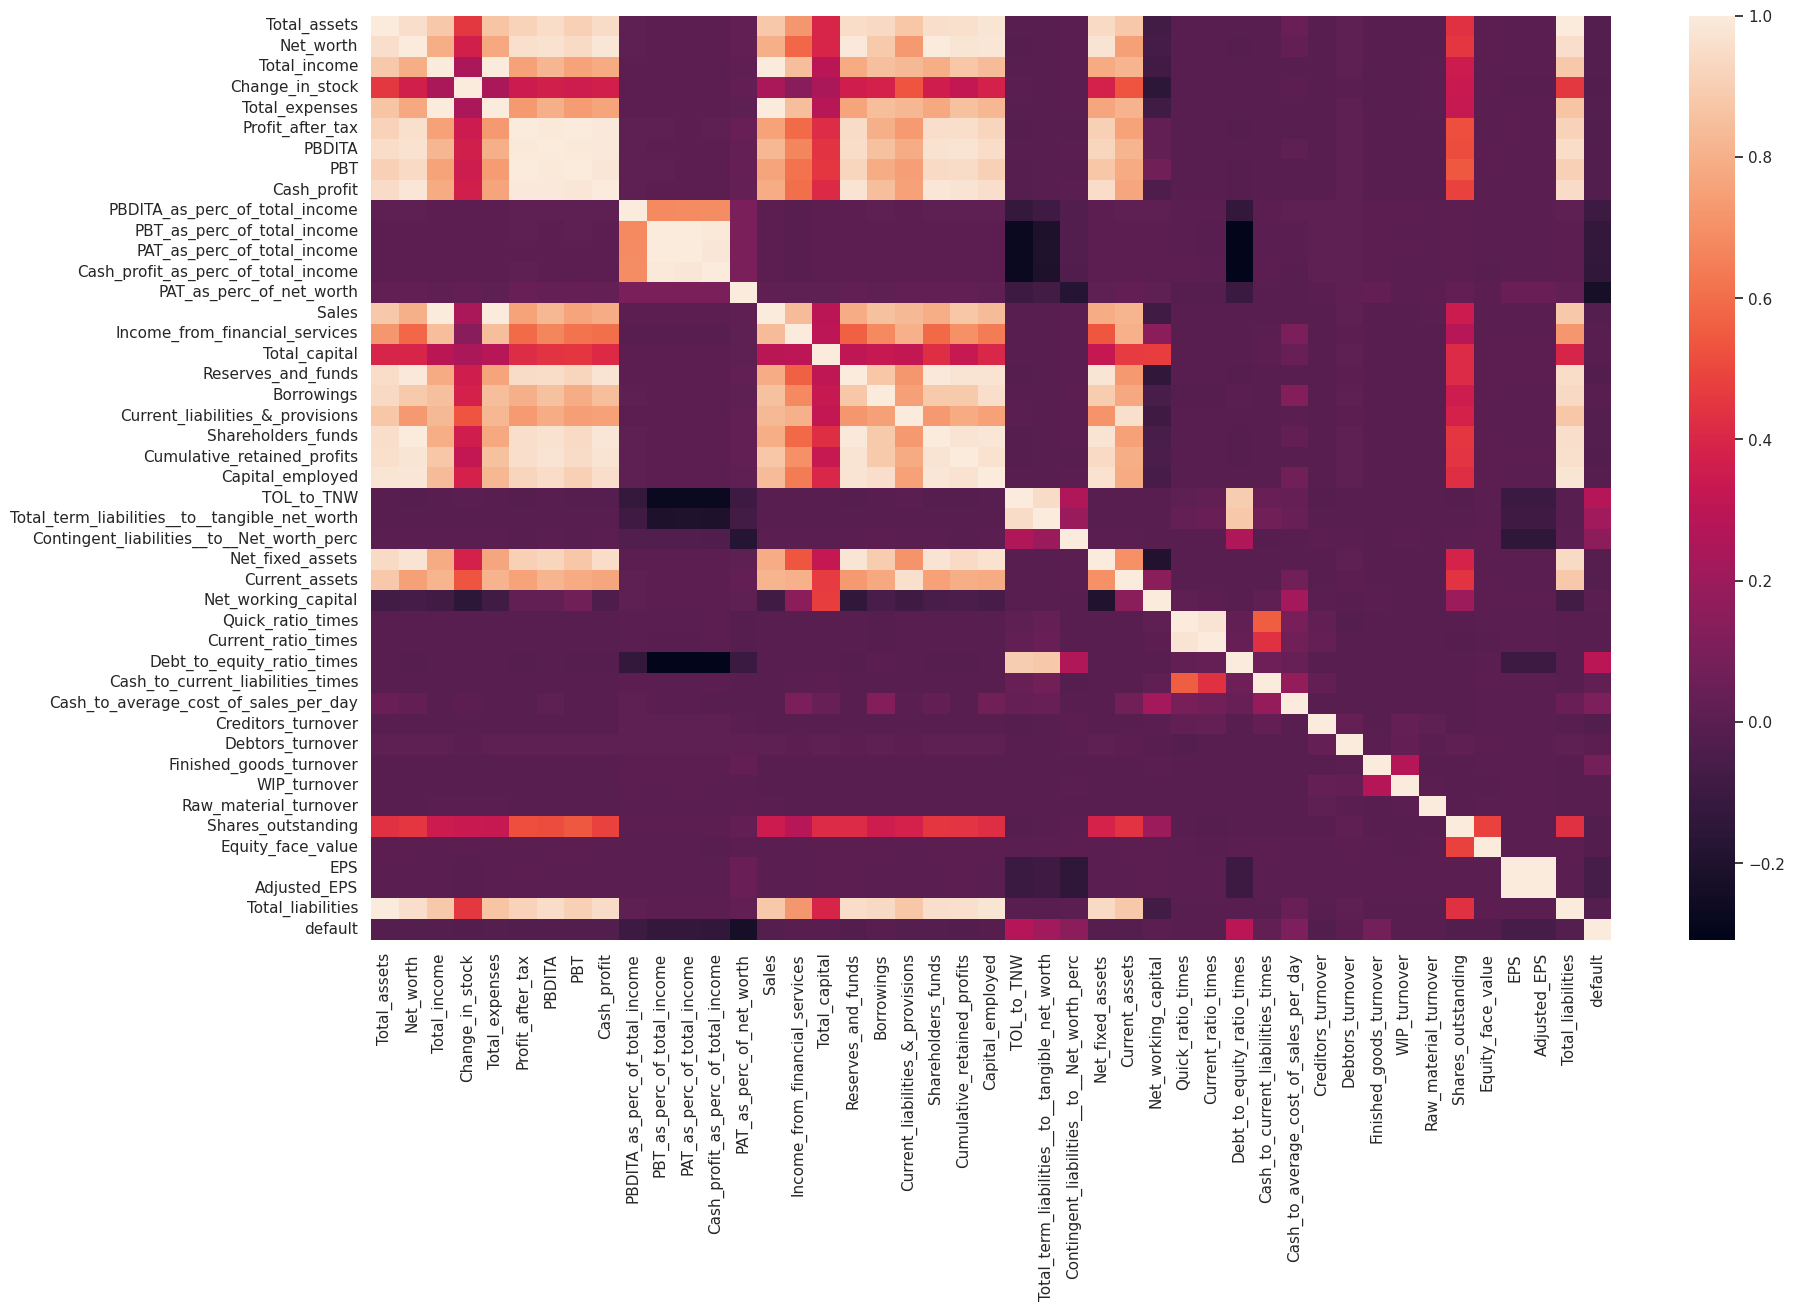

In [ ]:
plt.figure(figsize = (20,12))

sns.heatmap(company_imputed.corr())
plt.show()

In [ ]:
company_imputed.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_financial_services',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', '

In [ ]:
feature_df1 = company_imputed.corr()['default'].iloc[0:].to_frame().reset_index().rename(columns = {'index':'feature','default':\
                                                                                      'corr_coeff'})

In [ ]:
# company_imputed.corr()['default'].iloc[0:].to_frame().reset_index()

In [ ]:
feature_df1

,feature,corr_coeff
0,Total_assets,-0.017430
1,Net_worth,-0.021610
2,Total_income,-0.017981
3,Change_in_stock,-0.022878
4,Total_expenses,-0.017248
5,Profit_after_tax,-0.030197
6,PBDITA,-0.024619
7,PBT,-0.029471
8,Cash_profit,-0.027449
9,PBDITA_as_perc_of_total_income,-0.099750


In [ ]:
# technique 2 - Random forest feature importance


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_label = RandomForestClassifier()




In [ ]:
rf_label.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
fi_df2 = pd.DataFrame({'feature': x_train.columns,\
                       'rf_importance' : rf_label.feature_importances_}).sort_values(by = 'rf_importance',ascending = False)

In [ ]:
fi_df2

,feature,rf_importance
13,PAT_as_perc_of_net_worth,0.071070
31,Debt_to_equity_ratio_times,0.070271
23,TOL_to_TNW,0.057267
8,Cash_profit,0.052351
24,Total_term_liabilities__to__tangible_net_worth,0.045727
20,Shareholders_funds,0.040882
5,Profit_after_tax,0.037711
7,PBT,0.036027
1,Net_worth,0.034970
11,PAT_as_perc_of_total_income,0.032565


In [ ]:
# technique 3 = gradient boosting feature importance

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gb_label = GradientBoostingClassifier()

In [ ]:
gb_label.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
fi_df3 = pd.DataFrame({'feature':x_train.columns,\
                       'gb_importance' : gb_label.feature_importances_}).\
                       sort_values(by = 'gb_importance',ascending = False)

fi_df3

,feature,gb_importance
13,PAT_as_perc_of_net_worth,0.282145
23,TOL_to_TNW,0.067340
31,Debt_to_equity_ratio_times,0.058599
5,Profit_after_tax,0.054090
36,Finished_goods_turnover,0.052749
1,Net_worth,0.037757
8,Cash_profit,0.037240
20,Shareholders_funds,0.030358
28,Net_working_capital,0.030152
7,PBT,0.028642


In [ ]:
"""## 20 features ==> 86

# 50 feats ==> 87

we will consider cost benefit ratio as well and since running a model over higher featuers might be computationally
expensive , therefore we are comfortable to sacrifice little bit of accuracy metrics

"""

'## 20 features ==> 86\n\n# 50 feats ==> 87\n\nwe will consider cost benefit ratio as well and since running a model over higher featuers might be computationally\nexpensive , therefore we are comfortable to sacrifice little bit of accuracy metrics\n\n'

In [ ]:
### model creation ==> random forest, xgboost, adaboost, logistic regression

# Train ML models over the data

## 1. Logistic Regression

In [ ]:
x = x_smote
y = y_smote

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

default_train = pd.concat([x_train,y_train],axis = 1)
default_test = pd.concat([x_test,y_test],axis = 1)

In [ ]:
print("x's shape : ",x.shape)
print("y's shape : ", y.shape)
print("x_train's shape :", x_train.shape)
print("y_train's shape : ", y_train.shape)
print("default_train's shape : ", default_train.shape)
print("default_test's shape : ", default_test.shape)

x's shape :  (6596, 44)
y's shape :  (6596,)
x_train's shape : (5276, 44)
y_train's shape :  (5276,)
default_train's shape :  (5276, 45)
default_test's shape :  (1320, 45)


In [ ]:
# .2 * 6596

In [ ]:
default_train.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income',
       'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_financial_services',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', '

In [ ]:
## logistic regession model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [ ]:
lr = LogisticRegression()
from sklearn.feature_selection import RFE ##feature_selection



In [ ]:
selector = RFE(estimator = lr,n_features_to_select= 38,step=1)
selector = selector.fit(x_train,y_train)

selector.n_features_

38

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 6, 1, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1])

In [ ]:
df = pd.DataFrame({'feature' : x_train.columns,'Rank': selector.ranking_})
df

,feature,Rank
0,Total_assets,1
1,Net_worth,1
2,Total_income,1
3,Change_in_stock,1
4,Total_expenses,1
5,Profit_after_tax,1
6,PBDITA,1
7,PBT,1
8,Cash_profit,1
9,PBDITA_as_perc_of_total_income,1


In [ ]:
pred_train = selector.predict(x_train)
pred_test = selector.predict(x_test)

In [ ]:
print('******* train confusion matrix ********'*5)
print(confusion_matrix(y_train,pred_train))
print('***** test confuison matrix *****'* 5)
print(confusion_matrix( y_test, pred_test))

******* train confusion matrix *************** train confusion matrix *************** train confusion matrix *************** train confusion matrix *************** train confusion matrix ********
[[2426  201]
 [ 615 2034]]
***** test confuison matrix ********** test confuison matrix ********** test confuison matrix ********** test confuison matrix ********** test confuison matrix *****
[[632  39]
 [146 503]]


In [ ]:
print('train accuracy score : ',accuracy_score(y_train,pred_train))
print('test accuracy score : ',accuracy_score(y_test,pred_test))

train accuracy score :  0.8453373768006065
test accuracy score :  0.8598484848484849


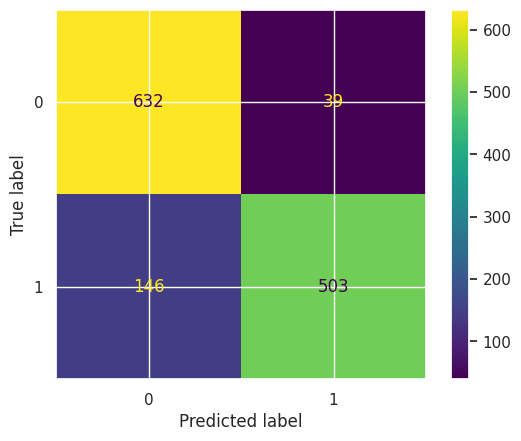

In [ ]:
cm = confusion_matrix(y_test, pred_test, labels=selector.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=selector.classes_)
disp.plot()

plt.show()

In [ ]:
## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.feature_selection import RFE


In [ ]:
selector1 = RFE(estimator = rf,n_features_to_select = 30,step = 1)
selector1 = selector1.fit(x_train,y_train)

In [ ]:
pred_train_rf = selector1.predict(x_train)
pred_test_rf = selector1.predict(x_test)

In [ ]:
print( 'training accuracy : ', accuracy_score(y_train,pred_train_rf))
print( 'test accuracy : ', accuracy_score(y_test,pred_test_rf))

training accuracy :  1.0
test accuracy :  0.9719696969696969


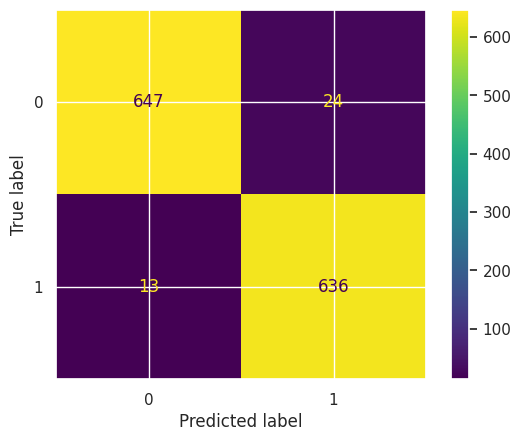

In [ ]:
cm = confusion_matrix(y_test, pred_test_rf, labels=selector1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=selector1.classes_)
disp.plot()

plt.show()

# cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
training = cross_val_score(selector1,x_train,y_train, cv = 10 )
print(training.mean())
print(training.max())

0.9681552239664194
0.9829545454545454


In [ ]:
training

array([0.95265152, 0.97537879, 0.97159091, 0.96212121, 0.97727273,
       0.98295455, 0.9601518 , 0.98102467, 0.95635674, 0.96204934])

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()



In [ ]:
selector2 = RFE(estimator = xgb , n_features_to_select = 30 , step = 1)
selector2 = selector2.fit(x_train,y_train)

In [ ]:
pred_train_xgb = selector2.predict(x_train)
pred_test_xgb = selector2.predict(x_test)

In [ ]:
print("training accuracy : ", accuracy_score(y_train,pred_train_xgb))
print("test accuracy : ", accuracy_score(y_test,pred_test_xgb))

training accuracy :  1.0
test accuracy :  0.975


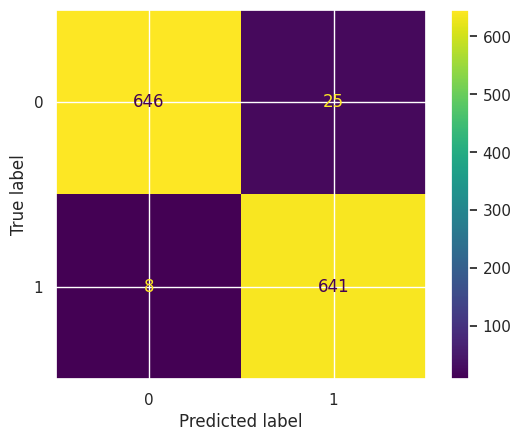

In [ ]:
cm = confusion_matrix(y_test, pred_test_xgb, labels=selector2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=selector2.classes_)
disp.plot()

plt.show()

In [ ]:
## homework : calculate cross validation score for xgboost

In [ ]:
## ADAboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()

In [ ]:
# from sklearn.feature_selection import RFE
selector3 = RFE(estimator = adb, n_features_to_select = 30 , step = 1)
selector3 = selector3.fit(x_train,y_train)

In [ ]:
pred_train_adb = selector3.predict(x_train)
pred_test_adb = selector3.predict(x_test)

In [ ]:
print('train acc score :', accuracy_score(y_train, pred_train_adb))
print('test acc score :', accuracy_score(y_test, pred_test_adb))

train acc score : 0.9122441243366186
test acc score : 0.9053030303030303


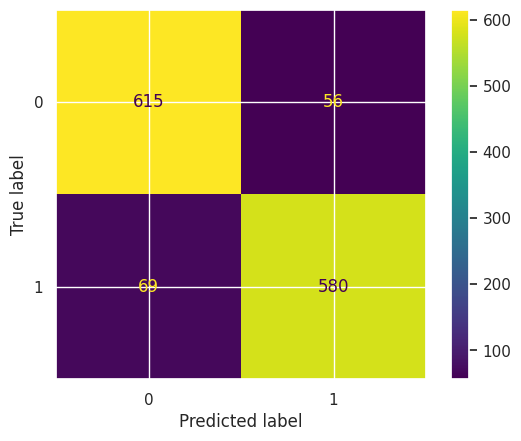

In [ ]:
cm = confusion_matrix(y_test, pred_test_adb, labels=selector3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=selector3.classes_)
disp.plot()

plt.show()